# STEAM RECOMMENDER SYSTEM

### Importing necessary packages

In [1]:
# installing the library suprise
!pip install scikit-surprise

     |████████████████████████████████| 6.5MB 2.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1675378 sha256=524b90a95a23401b227b4b88fa082a5ad13dec2589feea0f0cd1ac2711e3e59c
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [26]:
# importing necessary packages
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from collections import Counter

from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
nltk.download('punkt')
nltk.download('stopwords')
import re
import string

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Importing the cleaned data set

In [4]:
# unziping the folder containing the steam_rs.csv data
!unzip steam_rs.zip

Archive:  steam_rs.zip
  inflating: steam_rs.csv            


In [0]:
# importing the data set
steam = pd.read_csv('steam_rs.csv')

In [6]:
# displaying 5 rows of the data frame
steam.head()

,id,appid,name,purchase,hours_of_play,developer,publisher,positive,negative,release_date,english,platforms,required_age,categories,genres,steamspy_tags,achievements,average_playtime,median_playtime,owners,detailed_description,about_the_game,short_description,price,rank
0,151603712,570,Dota 2,purchase,0.0,Valve,Valve,1097301,194384,2013-07-09,1,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,23944,801,100000000-200000000,<strong>The most-played game on Steam.</strong...,<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...",0.0,84.95113
1,151603712,570,Dota 2,play,0.5,Valve,Valve,1097301,194384,2013-07-09,1,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,23944,801,100000000-200000000,<strong>The most-played game on Steam.</strong...,<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...",0.0,84.95113
2,187131847,570,Dota 2,purchase,0.0,Valve,Valve,1097301,194384,2013-07-09,1,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,23944,801,100000000-200000000,<strong>The most-played game on Steam.</strong...,<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...",0.0,84.95113
3,187131847,570,Dota 2,play,2.3,Valve,Valve,1097301,194384,2013-07-09,1,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,23944,801,100000000-200000000,<strong>The most-played game on Steam.</strong...,<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...",0.0,84.95113
4,176410694,570,Dota 2,purchase,0.0,Valve,Valve,1097301,194384,2013-07-09,1,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,23944,801,100000000-200000000,<strong>The most-played game on Steam.</strong...,<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...",0.0,84.95113


In [7]:
# getting name count
steam_name_count = pd.DataFrame(steam.groupby('name').size().sort_values(), columns=['count'])
steam_name_count

,count
name,
Putt-Putt and Pep's Dog on a Stick,1
Battle Mages,1
Gold Rush! Anniversary,1
Vertex Dispenser,1
Verde Station,1
...,...
Counter-Strike,1424
Left 4 Dead 2,1752
Unturned,2632


In [8]:
# checking games based on their rank
steam.groupby(['name'])['rank'].mean().reset_index()

,name,rank
0,0RBITALIS,71.785714
1,10 Second Ninja,85.897436
2,"10,000,000",89.694459
3,100% Orange Juice,93.090154
4,1000 Amps,78.877888
...,...,...
2292,rFactor 2,86.908517
2293,resident evil 4 / biohazard 4,86.958567
2294,rymdkapsel,82.568807
2295,samurai_jazz,68.181818


In [9]:
# obtaining the frequencies for each of the ranks given to a specific game
ratings = steam['rank'].value_counts()
ratings

84.951130    9682
94.121113    4646
90.935142    2632
97.067529    1752
97.461406    1424
             ... 
22.826087       1
85.915493       1
55.185185       1
66.812227       1
82.377049       1
Name: rank, Length: 2182, dtype: int64

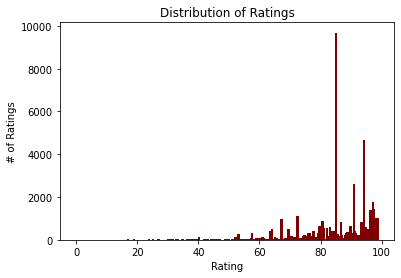

In [10]:
# plotting distribution of ratings
ratings_sorted = sorted(list(zip(ratings.index, ratings)))
plt.bar([r[0] for r in ratings_sorted], [r[1] for r in ratings_sorted], color='maroon')
plt.xlabel("Rating")
plt.ylabel("# of Ratings")
plt.title("Distribution of Ratings")
plt.show()

From this graph above, most of the ratings seem to be around 85%, as well as that it can be seen that there seem to be a very small amount of games rated less than 50%.

In [11]:
# checking users with the highest amount of hours spent playing 
steam.groupby('id')['hours_of_play'].agg(np.sum).sort_values(ascending=False)[0:10]

id
73017395     11754.0
100630947    10445.7
153382649     9640.0
130882834     7765.0
52567955      7704.8
14544587      7242.7
121199670     6755.2
67694595      6269.7
86256882      6242.7
12660489      6061.5
Name: hours_of_play, dtype: float64

In [12]:
# obtaining a count of all the unique ids and app ids
print("Unique player ids :", steam["id"].nunique())
print("Unique app ids :", steam["name"].nunique())

Unique player ids : 10350
Unique app ids : 2297


Text(0.5, 1.0, 'Hours of play per game')

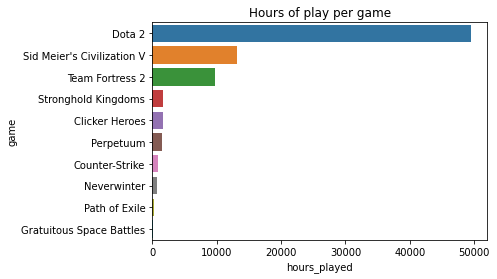

In [13]:
# graphing the amount of hours spent on a game
top = 10

user_counts = steam.groupby('id')['hours_of_play'].agg(np.sum).sort_values(ascending=False)[0:top]
mask = steam['id'].isin(user_counts.index)
df_infos_user = steam.loc[mask].loc[steam['purchase'] == 'play']
hours_played = df_infos_user.groupby('name')['hours_of_play'].agg(np.sum).sort_values(ascending=False)
hours_played = pd.DataFrame({'game': hours_played.index, 'hours_played': hours_played.values})[0:10]

sns.barplot(y = 'game', x = 'hours_played', data = hours_played)

plt.title("Hours of play per game")

From this graph it can be seen that Dota 2 is the most played steam game next to Sid meier's civilization V and team fortress 2.

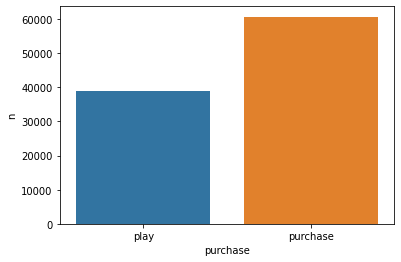

In [14]:
# checking amount of users that have either played or purchased a game
actions = steam.groupby('purchase')['purchase'].agg('count')
actions = pd.DataFrame({'purchase': actions.index, 'n': actions.values})
sns.barplot(x = 'purchase', y = 'n', data = actions)

From this graph it indicates that most users have purchased a game from steam, but have not yet played it yet.

# Content based model

Content based recommender systems predict what the user likes based on what they have liked in the past. This creates personlizes recommendations for the user based on interests, and other such factors. To recommend a user similar items that the user has previously liked, TFIDF can be used, as it helps identify which item is similar to each other. Each of these items are represented using TFIDF vectors.
<br><br>
TFIDF is a very crucial in building the recommender system. Term frequency (TF) is the frequencies of a specific word in a document, and inverse document frequency (IDF) is the universe of document frequencies throughout the entire corpus of documents.

In [15]:
# displaying the data frame
steam.head()

,id,appid,name,purchase,hours_of_play,developer,publisher,positive,negative,release_date,english,platforms,required_age,categories,genres,steamspy_tags,achievements,average_playtime,median_playtime,owners,detailed_description,about_the_game,short_description,price,rank
0,151603712,570,Dota 2,purchase,0.0,Valve,Valve,1097301,194384,2013-07-09,1,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,23944,801,100000000-200000000,<strong>The most-played game on Steam.</strong...,<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...",0.0,84.95113
1,151603712,570,Dota 2,play,0.5,Valve,Valve,1097301,194384,2013-07-09,1,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,23944,801,100000000-200000000,<strong>The most-played game on Steam.</strong...,<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...",0.0,84.95113
2,187131847,570,Dota 2,purchase,0.0,Valve,Valve,1097301,194384,2013-07-09,1,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,23944,801,100000000-200000000,<strong>The most-played game on Steam.</strong...,<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...",0.0,84.95113
3,187131847,570,Dota 2,play,2.3,Valve,Valve,1097301,194384,2013-07-09,1,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,23944,801,100000000-200000000,<strong>The most-played game on Steam.</strong...,<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...",0.0,84.95113
4,176410694,570,Dota 2,purchase,0.0,Valve,Valve,1097301,194384,2013-07-09,1,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,23944,801,100000000-200000000,<strong>The most-played game on Steam.</strong...,<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...",0.0,84.95113


In [16]:
# checking the current shape of the data frame
steam.shape

(99632, 25)

In [0]:
# dropping the duplicate ids, and keeping the most recent ones as making sure it dosent remove all the unique games in the data frame
steam.drop_duplicates(subset = ['id', 'name'],
                     keep = 'last', inplace = True)

In [18]:
# checking the shape after removing duplicates
steam.shape

(60446, 25)

Removing the duplicate ids reduced the size of the data frame from its inital 99632 rows to 60446 rows.

In [19]:
# obtaining a count of all the unique ids and app ids
print("Unique player ids :", steam["id"].nunique())
print("Unique app ids :", steam["name"].nunique())

Unique SteamIds : 10350
Unique AppIds : 2297


From here it can be seen that removing the duplicate ids kept all of the unique app ids. It also kept all the unique player ids.

Following this i will be selecting key features that i will want to base my recommedations on, and i will be selecting 'name', 'genre', 'categories', and 'short_description' as my main features.

In [0]:
# creating tags for each words
tags = {}
for col in ['name', 'categories', 'genres', 'short_description']:
    for id in steam['id'].unique():
        for i in steam[steam['id'] == id][col]:
            if id in tags:
                tags[id].append(' '.join(i.lower().split('|')))
            else:
                tags[id] = i.lower().split('|')

In [0]:
# creating a list from the tags
tags_list = list(tags.values())

In [22]:
# viewing tags
tags_list[1:2]

[['dota 2',
  'multi-player;co-op;steam trading cards;steam workshop;steamvr collectibles;in-app purchases;valve anti-cheat enabled',
  'action;free to play;strategy',
  "every day, millions of players worldwide enter battle as one of over a hundred dota heroes. and no matter if it's their 10th hour of play or 1,000th, there's always something new to discover. with regular updates that ensure a constant evolution of gameplay, features, and heroes, dota 2 has taken on a life of its own."]]

In [0]:
# getting all the english stopwords and storing them in stopwords_list
stopwords_list = stopwords.words('english')

In [0]:
# removing punctuation
stopwords_list += list(string.punctuation)

In [29]:
# checking most common words in the stop words list
most_common = FreqDist(stopwords_list)
most_common.most_common(20)

[('i', 1),
 ('me', 1),
 ('my', 1),
 ('myself', 1),
 ('we', 1),
 ('our', 1),
 ('ours', 1),
 ('ourselves', 1),
 ('you', 1),
 ("you're", 1),
 ("you've", 1),
 ("you'll", 1),
 ("you'd", 1),
 ('your', 1),
 ('yours', 1),
 ('yourself', 1),
 ('yourselves', 1),
 ('he', 1),
 ('him', 1),
 ('his', 1)]

In [30]:
# checking length of all the stop words
len(most_common)

211

In [0]:
# a function that removes stopwords, tozenizes the article and makes each of the tokens lowercase
def process_article(article):
    
    ''' a function that removes stopwords, tozenizes the article and makes each of the tokens lowercase.'''

    article = ' '.join(article)
    tokens = word_tokenize(article) 
    tokens_2 = [] 

    
    for token in tokens:
    
        if token.lower() not in stopwords_list:
            tokens_2.append(token.lower())
                
    return tokens_2

In [0]:
# preprocessing the data
processed_data = list(map(process_article, tags_list))

In [33]:
# checking the length of the processed data
len(processed_data)

10350

In [34]:
# obtaining the total vocabulary size
total_vocab = set()
for doc in processed_data:
    total_vocab.update(doc)
len(total_vocab)

11896

In [0]:
# concatenating every article into a single list
articles_concat = []
for doc in processed_data:
    articles_concat += doc

In [0]:
# passing articles_concant to FreqDist() in order to get the most common words
freqdist = FreqDist(articles_concat)

In [37]:
# obtaining the 20 most common words
most_common = freqdist.most_common(20)
most_common

[('steam', 122235),
 ('action', 55408),
 ('multi-player', 48230),
 ('single-player', 42170),
 ('cards', 37281),
 ('trading', 37106),
 ('achievements', 36820),
 ('play', 32801),
 ('co-op', 32019),
 ('support', 30384),
 ('controller', 27867),
 ('online', 26192),
 ('game', 26064),
 ('free', 24311),
 ('indie', 23773),
 ("'s", 23168),
 ('cloud', 22937),
 ('2', 21595),
 ('multiplayer', 20859),
 ('adventure', 20085)]

<BarContainer object of 20 artists>

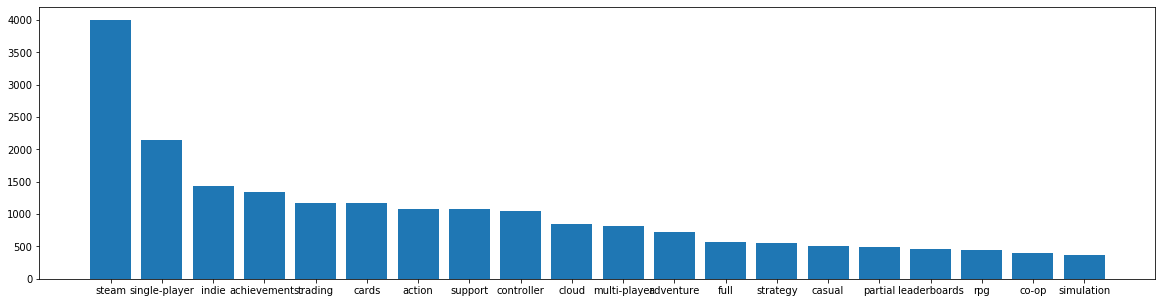

In [0]:
# graphing the 20 most common words
plt.figure(figsize = (20, 5))
plt.bar([word[0] for word in most_common], [word[1] for word in most_common])

In [0]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), stop_words=stopwords_list)

In [0]:
tags_list_2 = [' '.join(x) for x in tags_list]

In [0]:
tfidf_matrix = tfidf.fit_transform(tags_list_2)

In [0]:
tfidf_matrix.shape

(568, 554)

In [0]:
#instantiate SVD
svd = TruncatedSVD(n_components=500, n_iter=7, random_state=42)

#fit and transform the vectorized tf-idf matrix 
tf_idf_data_train_svd = svd.fit_transform(tfidf_matrix)

In [0]:
print(svd.explained_variance_ratio_.sum())

0.9999999999999993


### Calculating cosine similarities

In [0]:
from sklearn.metrics.pairwise import linear_kernel

In [0]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

### Making recommendations

In [0]:
# creating a Series for the game titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(steam.name)

In [0]:
#  defining the function that takes in game title 
# as input and returns the top 10 recommended games
def recommendations(title, cosine_similarities = cosine_similarities):
    
    # initializing the empty list of recommended movies
    recommended_games = []
    
    # gettin the index of the game that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar games
    top_10_indexes = list(score_series[1:11].index)
    
    # populating the list with the titles of the best 10 matching games
    for i in top_10_indexes:
        recommended_games.append(list(df.name)[i])

    return recommended_games

In [0]:
recommendations('Dota 2')

IndexError: index 9681 is out of bounds for axis 0 with size 568

### Evaluation

<b> MAE & RMSE

In [0]:
predictions = svd.test(testset)
accuracy.rmse(predictions)

In [0]:
# taking a look at the first 10 rows of our test set
predictions[:10]

In [0]:
print("Number of users: ", df.userId.nunique()) 
print("Number of movies: ", df.movieId.nunique())


In [0]:
user = 5
item = 100
svd.predict(user, item)

In [0]:
steam_id_tag = steam['appid']
indices = pd.Series(steam.index, index=sample['appid'])

In [0]:
def get_most_similar_games(appid, n = 20):
    idx = indices[appid]
    idx = np.array(idx, dtype=np.integer)
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0:n]

    game_indices = [i[0] for i in sim_scores]

    recs = pd.DataFrame(columns= steam.columns)
    for i in a_id.loc[game_indices]:

        if i != name: 
            recs = recs.append(steam[steam['appid'] == i])
    return recs

In [0]:
steam[steam['appid'] == 20]

In [0]:
get_most_similar_games(20)